Exploring the distribution of goals scored in matches. Calculating statistics such as average goals per match, highest-scoring match, and teams with the best and worst defensive records.

In [ ]:
import pandas as pd

# Load the results dataset
results = pd.read_csv('results.csv')

# Calculate average goals per match
average_goals_per_match = (results['home_score'] + results['away_score']).mean()

# Find the highest-scoring match
highest_scoring_match = results.loc[(results['home_score'] + results['away_score']).idxmax()]

# Find teams with the best and worst defensive records
teams_goals_conceded = pd.concat([results.groupby('home_team')['away_score'].sum(), results.groupby('away_team')['home_score'].sum()], axis=1, keys=['home_goals_conceded', 'away_goals_conceded']).fillna(0)
teams_goals_conceded['total_goals_conceded'] = teams_goals_conceded['home_goals_conceded'] + teams_goals_conceded['away_goals_conceded']

best_defensive_team = teams_goals_conceded['total_goals_conceded'].idxmin()
worst_defensive_team = teams_goals_conceded['total_goals_conceded'].idxmax()

# Print the results
print(f"Average Goals per Match: {average_goals_per_match:.2f}")
print(f"Highest-Scoring Match:\n{highest_scoring_match}")
print(f"Team with the Best Defensive Record: {best_defensive_team}")
print(f"Team with the Worst Defensive Record: {worst_defensive_team}")

Average Goals per Match: 2.92
Highest-Scoring Match:
date                            2001-04-11
home_team                        Australia
away_team                   American Samoa
home_score                              31
away_score                               0
tournament    FIFA World Cup qualification
city                         Coffs Harbour
country                          Australia
neutral                              False
Name: 24160, dtype: object
Team with the Best Defensive Record: Maule Sur
Team with the Worst Defensive Record: Finland


Predicting the outcome of matches based on historical data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the datasets
goalscorers = pd.read_csv('goalscorers.csv')
results = pd.read_csv('results.csv')

# Merge datasets to create a consolidated dataset
merged_data = pd.merge(results, goalscorers, on=['date', 'home_team', 'away_team'], how='left')

# Feature engineering
# You may need to preprocess the data, handle missing values, and encode categorical variables

# Define features and target variable
features = ['home_team', 'away_team', 'tournament', 'city', 'country']
X = pd.get_dummies(merged_data[features])
y = merged_data['home_score'] < merged_data['away_score']  # Binary outcome: 1 if home team wins, 0 otherwise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a random forest classifier (you can experiment with other algorithms)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report for more detailed evaluation
print(classification_report(y_test, predictions))

Accuracy: 0.83
              precision    recall  f1-score   support

       False       0.86      0.92      0.89     10341
        True       0.76      0.62      0.68      4217

    accuracy                           0.83     14558
   macro avg       0.81      0.77      0.79     14558
weighted avg       0.83      0.83      0.83     14558



Predicting winners of tournaments or specific matches.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the datasets
results = pd.read_csv('results.csv')
shootouts = pd.read_csv('shootouts.csv')

# Merge datasets to create a consolidated dataset
merged_data = pd.merge(results, shootouts, on=['date', 'home_team', 'away_team'], how='left')

# Feature engineering
# You may need to preprocess the data, handle missing values, and encode categorical variables

# Label encoding for categorical features
label_encoder = LabelEncoder()
merged_data['home_team'] = label_encoder.fit_transform(merged_data['home_team'])
merged_data['away_team'] = label_encoder.fit_transform(merged_data['away_team'])
merged_data['winner'] = label_encoder.fit_transform(merged_data['winner'].fillna('Draw'))

# Define features and target variable
features = ['home_team', 'away_team', 'home_score', 'away_score']
X = merged_data[features]
y = merged_data['winner']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a random forest classifier (you can experiment with other algorithms)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report for more detailed evaluation
#print(classification_report(y_test, predictions))

# Example: Predict tournament outcome for a specific match
sample_match = pd.DataFrame({
    'home_team': ['Brazil'],
    'away_team': ['Germany'],
    'home_score': [2],
    'away_score': [1]
})

# Apply label encoding to the sample input
sample_match['home_team'] = label_encoder.transform(sample_match['home_team'])
sample_match['away_team'] = label_encoder.transform(sample_match['away_team'])

# Make predictions for the sample input
sample_prediction = model.predict(sample_match)

# Print the predicted outcome for the sample input
print(f'Predicted Tournament Outcome: {label_encoder.inverse_transform(sample_prediction)[0]}')

Accuracy: 0.98
Predicted Tournament Outcome: Draw


Investigating the impact of home advantage on match outcomes. We analyze the results dataset to understand how playing at home influences a team's performance.

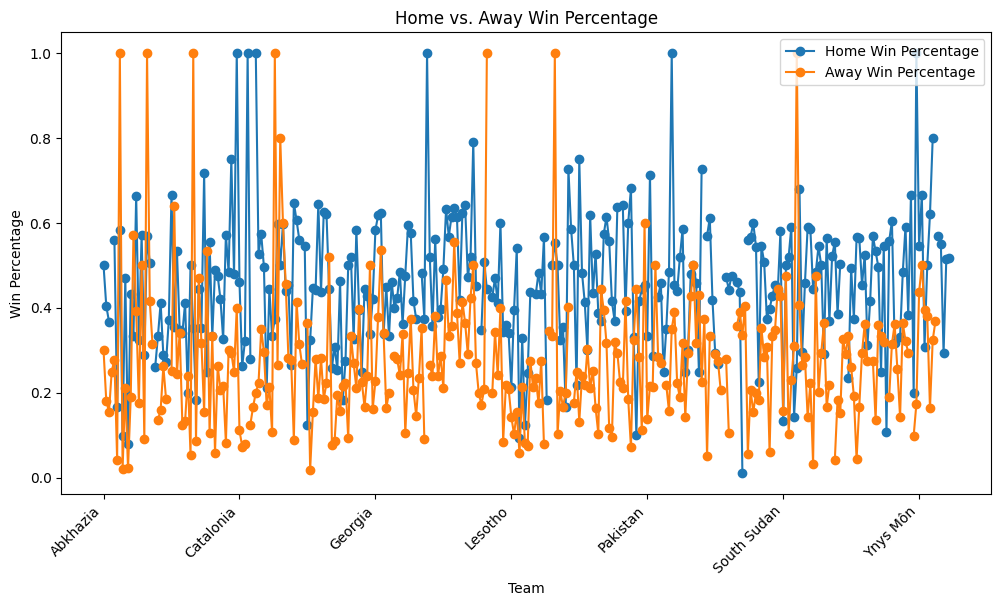

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results dataset
results = pd.read_csv('results.csv')

# Create a new column indicating whether the home team won (1), lost (-1), or it was a draw (0)
results['outcome'] = results.apply(lambda row: 1 if row['home_score'] > row['away_score'] else (-1 if row['home_score'] < row['away_score'] else 0), axis=1)

# Calculate the win percentage for home and away teams
home_win_percentage = results[results['outcome'] == 1]['home_team'].value_counts() / results['home_team'].value_counts()
away_win_percentage = results[results['outcome'] == -1]['away_team'].value_counts() / results['away_team'].value_counts()

# Plotting the home and away win percentages
plt.figure(figsize=(12, 6))
home_win_percentage.plot(label='Home Win Percentage', marker='o')
away_win_percentage.plot(label='Away Win Percentage', marker='o')
plt.title('Home vs. Away Win Percentage')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

Building a model to predict the final scores of soccer matches.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace with your actual dataset)
results = pd.read_csv('results.csv')

# Feature engineering and preprocessing
label_encoder = LabelEncoder()

results['home_team'] = label_encoder.fit_transform(results['home_team'])
results['away_team'] = label_encoder.fit_transform(results['away_team'])
results['tournament'] = label_encoder.fit_transform(results['tournament'])
results['city'] = label_encoder.fit_transform(results['city'])
results['country'] = label_encoder.fit_transform(results['country'])

# Define features and target variable
features = ['home_team', 'away_team', 'neutral']
X = results[features]
y_home = results['home_score']
y_away = results['away_score']

# Split the data into training and testing sets
X_train, X_test, y_home_train, y_home_test, y_away_train, y_away_test = train_test_split( X, y_home, y_away, test_size=0.2, random_state=42)

# Build separate models for home and away scores
home_model = RandomForestRegressor(n_estimators=100, random_state=42)
away_model = RandomForestRegressor(n_estimators=100, random_state=42)

home_model.fit(X_train, y_home_train)
away_model.fit(X_train, y_away_train)

# Make predictions on the test set
home_predictions = home_model.predict(X_test)
away_predictions = away_model.predict(X_test)

# Evaluate the model (use appropriate metrics for regression)
home_rmse = mean_squared_error(y_home_test, home_predictions, squared=False)
away_rmse = mean_squared_error(y_away_test, away_predictions, squared=False)

print(f'Home Score RMSE: {home_rmse:.2f}')
print(f'Away Score RMSE: {away_rmse:.2f}')

# Example: Predict scores for a specific match
sample_match = pd.DataFrame({
    'home_team': ['Brazil'],
    'away_team': ['Germany'],
    'neutral': [False]})

# Encode categorical features for prediction
sample_match['home_team'] = label_encoder.transform(sample_match['home_team'])
sample_match['away_team'] = label_encoder.transform(sample_match['away_team'])

# Make predictions
predicted_home_score = home_model.predict(sample_match)[0]
predicted_away_score = away_model.predict(sample_match)[0]
print(f'Predicted Home Score: {int(predicted_home_score)}')
print(f'Predicted Away Score: {int(predicted_away_score)}')

Home Score RMSE: 1.69
Away Score RMSE: 1.36
Predicted Home Score: 3
Predicted Away Score: 0
